In [1]:
from fastai.vision.all import *

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train.json')]

In [3]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [7]:
dls = ImageDataLoaders.from_df(df,
                               path,
                               folder='train',
                               valid_col='is_valid',
                               label_delim=' ',
                               item_tfms=Resize(460),
                               batch_tfms=aug_transforms(size=224))

/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


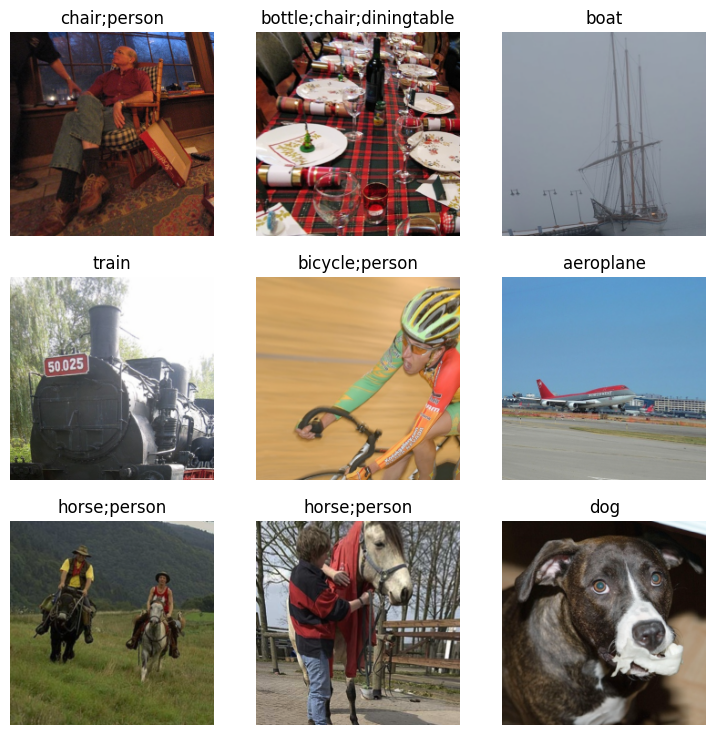

In [9]:
dls.show_batch()

In [11]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'

In [12]:
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 181MB/s]


/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/usr/local/lib/python3.12/dist-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

SuggestedLRs(valley=0.001737800776027143)

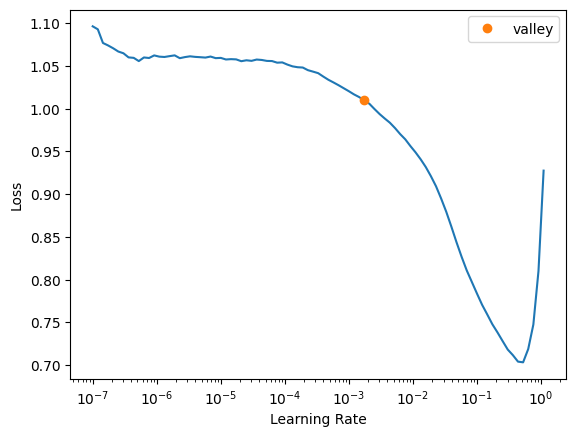

In [13]:
learn.lr_find()

In [16]:
learn.fine_tune(2, 2e-3)

epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.393005,0.215859,0.954821,0.714491,0.786136,00:43


epoch,train_loss,valid_loss,accuracy_multi,F1(macro),F1(samples),time
0,0.220927,0.125896,0.972590,0.801574,0.833010,00:49
1,0.169023,0.100318,0.976215,0.814666,0.836787,00:49


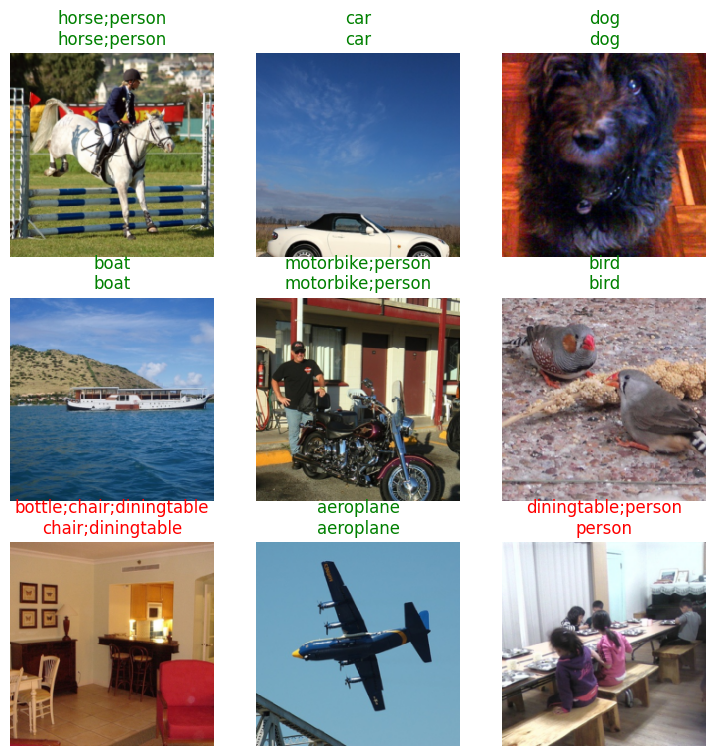

In [17]:
learn.show_results()

,target,predicted,probabilities,loss
0,cat;chair;person;pottedplant,dog;person,"tensor([0.0447, 0.0561, 0.0060, 0.0160, 0.0477, 0.0098, 0.1138, 0.0037, 0.0234,\n 0.0155, 0.0065, 0.9583, 0.0144, 0.0350, 0.9996, 0.0674, 0.0676, 0.4012,\n 0.0348, 0.0883])",0.8158537149429321
1,cow,horse;person,"tensor([0.1587, 0.0441, 0.0199, 0.0488, 0.0729, 0.0921, 0.0426, 0.0250, 0.0577,\n 0.2376, 0.0607, 0.0219, 0.9648, 0.0673, 0.9951, 0.0751, 0.0357, 0.0553,\n 0.0836, 0.0518])",0.5580475926399231
2,car,person,"tensor([0.1041, 0.2888, 0.0524, 0.1316, 0.0579, 0.0770, 0.1387, 0.0187, 0.0405,\n 0.0804, 0.0348, 0.0458, 0.0523, 0.0944, 0.9994, 0.1400, 0.0238, 0.0738,\n 0.0732, 0.1932])",0.5542021989822388
3,chair;dog;person;pottedplant;sofa;tvmonitor,dog;person;sofa,"tensor([0.0208, 0.0280, 0.0099, 0.0157, 0.0558, 0.0166, 0.0396, 0.0027, 0.0168,\n 0.0141, 0.0354, 0.5526, 0.0098, 0.0293, 0.9963, 0.0803, 0.0800, 0.9872,\n 0.0273, 0.0446])",0.5359554886817932
4,dog;pottedplant;sofa;tvmonitor,dog;sofa,"tensor([0.0138, 0.0197, 0.0032, 0.0080, 0.0333, 0.0156, 0.0068, 0.3689, 0.0550,\n 0.0318, 0.0406, 0.9924, 0.0183, 0.0078, 0.0095, 0.0177, 0.0297, 0.6277,\n 0.0135, 0.0139])",0.47763004899024963
5,chair;person;sofa;tvmonitor,,"tensor([0.0209, 0.0202, 0.0238, 0.0299, 0.1697, 0.0400, 0.0140, 0.0087, 0.0258,\n 0.0192, 0.0555, 0.0092, 0.0125, 0.0566, 0.2436, 0.2648, 0.0225, 0.1069,\n 0.0676, 0.2700])",0.47576257586479187
6,chair;person,chair;sofa,"tensor([0.0672, 0.1111, 0.0383, 0.1344, 0.0461, 0.0446, 0.0730, 0.0388, 0.7959,\n 0.0572, 0.0767, 0.0486, 0.0736, 0.0685, 0.0181, 0.3387, 0.0865, 0.9554,\n 0.0708, 0.4197])",0.4694163501262665
7,sofa;tvmonitor,chair;person;sofa;tvmonitor,"tensor([0.0273, 0.0606, 0.0410, 0.0329, 0.2018, 0.0677, 0.0070, 0.0059, 0.8709,\n 0.0555, 0.0715, 0.0180, 0.0763, 0.0117, 0.9948, 0.2017, 0.0325, 0.7226,\n 0.0573, 0.8213])",0.44297680258750916
8,chair;diningtable;person,person,"tensor([0.0036, 0.0454, 0.0141, 0.0161, 0.0252, 0.0754, 0.0459, 0.0247, 0.0266,\n 0.0136, 0.0117, 0.0110, 0.0246, 0.0464, 0.9968, 0.0250, 0.0063, 0.0400,\n 0.1978, 0.0121])",0.4366884231567383


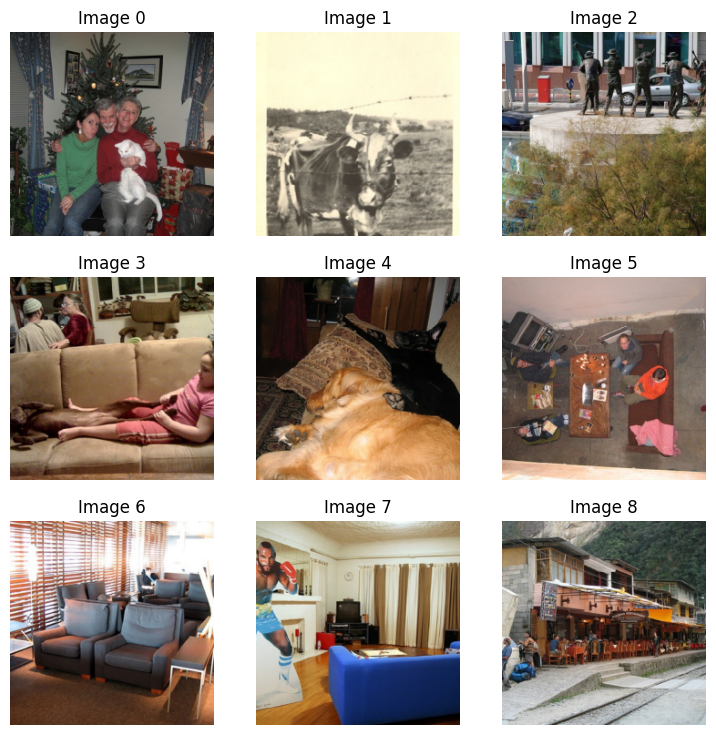

In [21]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

#**With Datablock API**

In [22]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

In [23]:
dls = pascal.dataloaders(df)

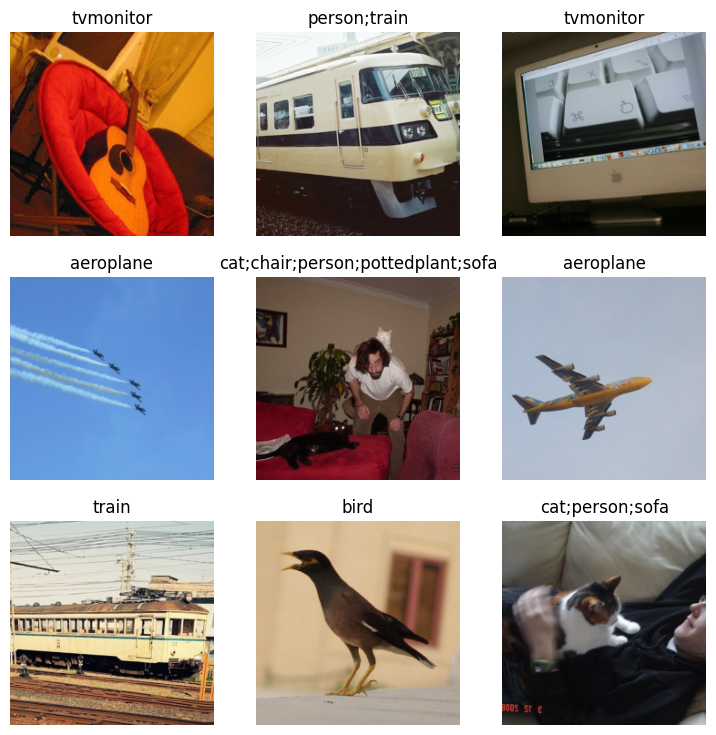

In [24]:
dls.show_batch(max_n=9)